In [3]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.7MB/s 
    100% |████████████████████████████████| 1.4MB 14.4MB/s 
    100% |████████████████████████████████| 133kB 27.7MB/s 
    100% |████████████████████████████████| 61kB 23.8MB/s 
    100% |████████████████████████████████| 4.7MB 6.9MB/s 
    100% |████████████████████████████████| 552kB 19.7MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import pandas as pd
import numpy as np
from gensim import corpora


train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)

train_data = train[list(range(50))].as_matrix()
test_data = test[list(range(50))].as_matrix()
train_labels = train[50].as_matrix()
test_labels = test[50].as_matrix()


In [33]:

print(train_data[10], train_labels[10])
print(train_data[13], train_labels[13])


[56651    16 13728 39179    16  3686    22  2116    10 18765     1   282
  3859 35158   523   283    17  5423    16 55954   282  3859 66277  4149
   283    15  8759    10   394     1   282 67648    16 28520   283  5640
    17  1643   153    22   963    14     1  4638    16  1385    16 25363
  1495 21386] 2
[  522    17   914  8524    16  4916    11     0  6609    16  6327   787
   909   529   193   483     0    75  1007    22 11996  1503    10  9038
   112  7218    22    89  9944    17   101    89  3850    11   302     8
     1   832  5584  8801    16  7858    15    74     8   154    16    20
    15     0] 0


In [0]:
dictionary = corpora.Dictionary.load_from_text('bungo_dict.txt').token2id

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM

In [0]:
model = Sequential()
model.add(Embedding(90000, 300, input_length=50))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train = train_data
x_test = test_data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [54]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 17s 339us/step - loss: 0.9193 - acc: 0.5964 - val_loss: 0.5646 - val_acc: 0.7606
Epoch 2/4
50000/50000 [==============================] - 16s 316us/step - loss: 0.3324 - acc: 0.9034 - val_loss: 0.2563 - val_acc: 0.9265
Epoch 3/4
50000/50000 [==============================] - 16s 318us/step - loss: 0.1350 - acc: 0.9634 - val_loss: 0.2227 - val_acc: 0.9298
Epoch 4/4
50000/50000 [==============================] - 16s 317us/step - loss: 0.0694 - acc: 0.9810 - val_loss: 0.2069 - val_acc: 0.9365


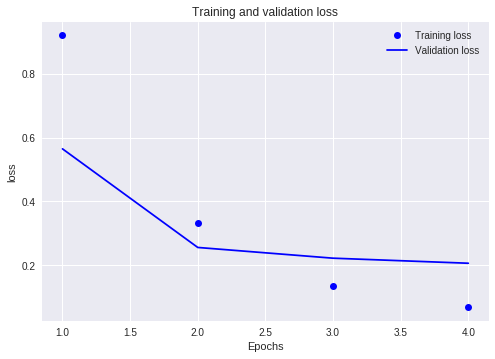

In [55]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

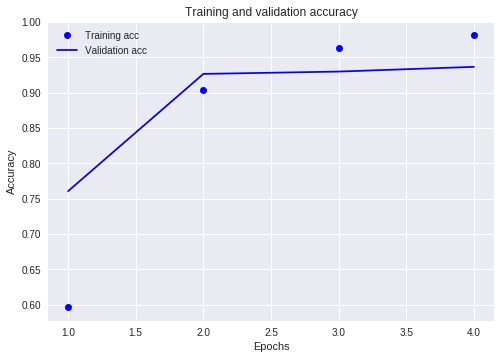

In [56]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('pre_trained_model.h5')

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 300)           27000000  
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 132       
Total params: 27,042,756
Trainable params: 27,042,756
Non-trainable params: 0
_________________________________________________________________


In [16]:
results = model.evaluate(x_test, one_hot_test_labels)

10000/10000 [==============================] - 11s 1ms/step


In [17]:
results

[0.41694464132785797, 0.8838]

In [0]:
predictions = model.predict(x_test)

In [29]:
predictions

array([[0.00582949, 0.00541033, 0.74136096, 0.00117193],
       [0.7776994 , 0.00273135, 0.01074179, 0.00156276],
       [0.08827035, 0.6226398 , 0.15057325, 0.22747813],
       ...,
       [0.8013103 , 0.00321234, 0.01078787, 0.00129371],
       [0.14342915, 0.8105646 , 0.24698767, 0.05156392],
       [0.01339402, 0.00162989, 0.00954668, 0.99457055]], dtype=float32)

In [63]:
inputstr = np.array([[87,5,868,1774,16,18368,209,419,0,76,429,16,2313,209,419,0,39170,22,48178,10,1821,8,16,11,4077,93,969,1,1927,800,27134,287,87,15,10355,10,250,18,8,16,1,12,5,87,16,8512,6,426,16,2846],
                    [282,1670,1558,6667,1,4292,17,457,51,11898,19,23,4970,8,1,283,230,3560,10,35548,16,523,15,4604,10,3105,0,37,17,457,3238,25055,15,334,10,3105,18,8,1,282,4308,0,4292,14332,615,10,78,91,8,23],
                    [283,13,4079,2196,8,1,282,4280,283,13,3560,10,457,2064,47,8,1,2012,5,282,2598,0,230,12,283,13,1223,8,1,626,17,3586,4977,22,2283,8,1,1709,15,4262,22,2252,10,0,1674,16,158,495,297,10],
                    ])

inputstr.shape


(3, 50)

In [64]:
predictions = model.predict(inputstr)
predictions

array([[1.3150679e-01, 3.7341777e-02, 3.3913818e-01, 4.9201328e-01],
       [5.2817509e-04, 7.7746809e-04, 1.9299051e-03, 9.9676442e-01],
       [9.9771440e-01, 3.7873819e-04, 1.4197422e-03, 4.8714268e-04]],
      dtype=float32)